In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# setting path
path = r'/Users/pierremora/Desktop/08:20:2023 INSTACART BASKET ANALYSIS'

In [3]:
# importing dataframe
ords_prods_merged= pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ords_prods_merged_sep_11.pkl'))

# Creating a bar chart

<Axes: xlabel='order_day_of_week'>

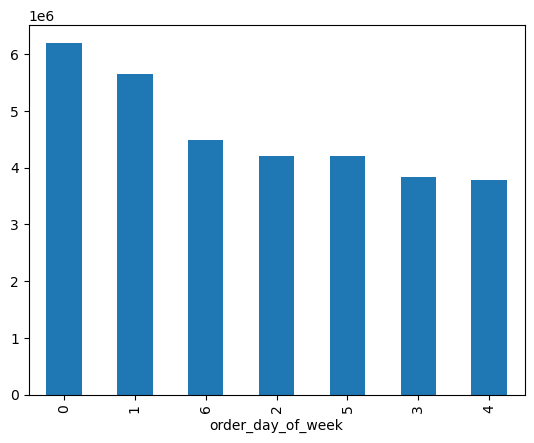

In [18]:
ords_prods_merged['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

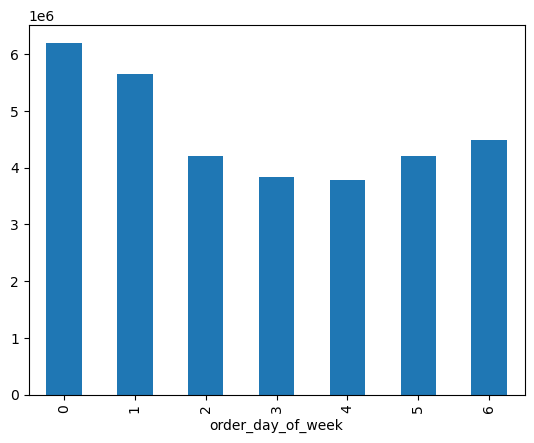

In [19]:
ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar()

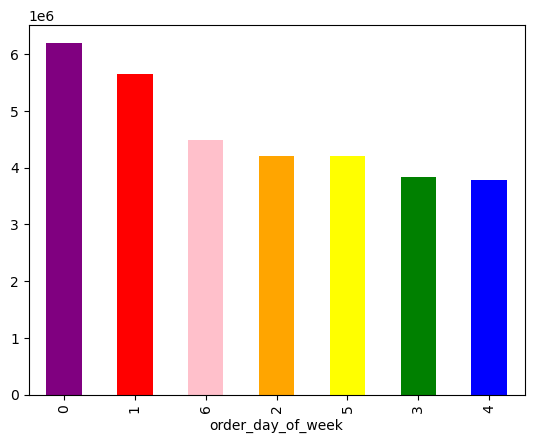

In [20]:
bar = ords_prods_merged['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

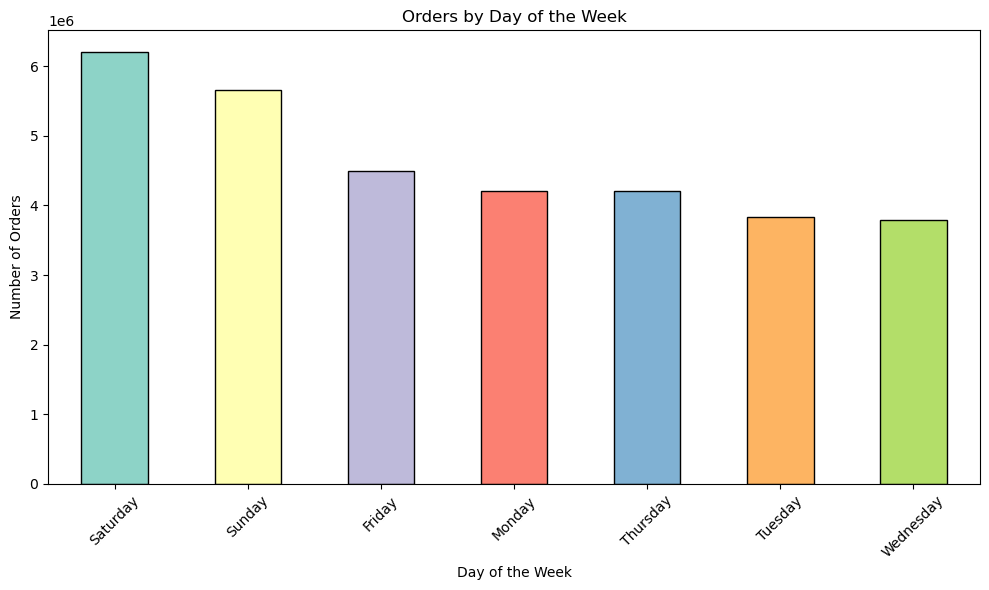

In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for color palettes

# Map numeric days to their names
day_mapping = {
    0: 'Saturday',
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'
}

# Define a custom color palette for the days
day_colors = sns.color_palette("Set3", len(day_mapping))

# Group orders by day of the week and count them
orders_by_day = ords_prods_merged['order_day_of_week'].map(day_mapping).value_counts()

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
orders_by_day.plot(kind='bar', color=day_colors, edgecolor='black')
plt.title('Orders by Day of the Week')  # Set the title here
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Define the file path and name using os.path.join()
file_path = os.path.join(path, 'Analysis', 'Visualizations', 'bar_orders_day_week.png')

# Save the chart as a PNG image with the specified path and name
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Show the chart
plt.show()



In [21]:
# Saving the bar as a PNG
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating a histogram

<Axes: ylabel='Frequency'>

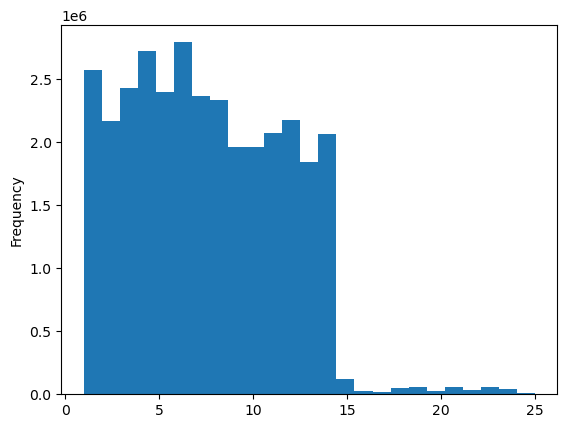

In [15]:
ords_prods_merged['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

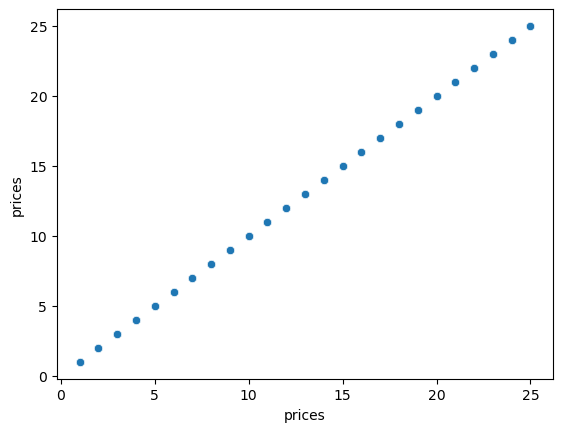

In [16]:
# creating a scatterplot to check any data inconsistency
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [6]:
# finding outliers using loc().
ords_prods_merged.loc[ords_prods_merged['prices'] < 0]

,order_id,user_id,number_of_orders,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_order_day,frequency_flag
29165516,183964,105,3,0,10,7.0,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Busiest day,Busiest days,Most Orders,18.250199,Loyal customer,10.298795,High Spender,8.0,frequent_customer
29165517,1851256,105,4,6,12,13.0,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Regularly busy,Regularly busy,Most Orders,18.250199,Loyal customer,10.298795,High Spender,8.0,frequent_customer
29165518,1915696,101,1,5,17,NaN,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Regularly busy,Regularly busy,Average Orders,16.337341,Loyal customer,8.232244,Low Spender,8.0,frequent_customer
29165519,2763293,101,2,4,16,13.0,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Least busy,Slowest days,Most Orders,16.337341,Loyal customer,8.232244,Low Spender,8.0,frequent_customer
29165520,2564805,101,4,1,17,30.0,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Regularly busy,Busiest days,Average Orders,16.337341,Loyal customer,8.232244,Low Spender,8.0,frequent_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,67,29,0,8,4.0,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Busiest day,Busiest days,Average Orders,17.596819,Loyal customer,10.471385,High Spender,7.0,frequent_customer
29166210,2363282,67,31,0,9,2.0,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Busiest day,Busiest days,Most Orders,17.596819,Loyal customer,10.471385,High Spender,7.0,frequent_customer
29166211,3181945,107,13,3,15,8.0,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Regularly busy,Slowest days,Most Orders,17.151364,Loyal customer,8.971662,Low Spender,8.0,frequent_customer
29166212,2486215,-85,7,3,20,4.0,33664,2 % Reduced Fat Milk,16,-31073,Low_range product,Regularly busy,Slowest days,Average Orders,16.539357,Loyal customer,10.237686,High Spender,8.0,frequent_customer


In [7]:
# marking outliers as Nan values
ords_prods_merged.loc[ords_prods_merged['prices'] <0 , 'prices'] = np.nan

In [8]:
# marking outliers as Nan values
ords_prods_merged.loc[ords_prods_merged['prices'] > 100 , 'prices'] = np.nan

In [17]:
# revision of max values
ords_prods_merged['prices'].max()

25.0

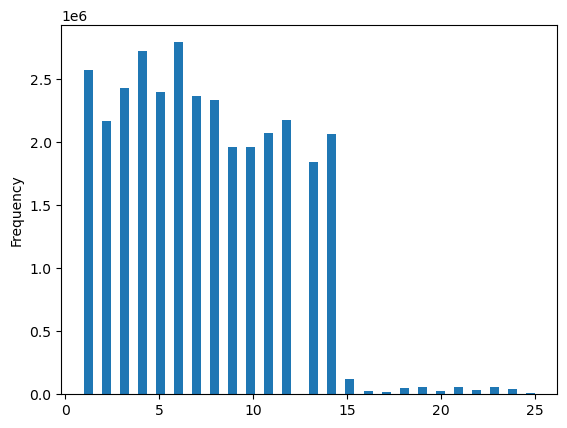

In [19]:
# checking new histogram
hist = ords_prods_merged['prices'].plot.hist(bins = 50)

In [ ]:
#adding legends and titles


In [12]:
# Saving the histogram as a PNG
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histogram_prices.png'))

In [20]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [21]:
# store 70% of the sample in a dataframe big
big = ords_prods_merged[dev]

In [23]:
# store 30% of the sample in a dataframe small
small = ords_prods_merged[~dev] 

In [24]:
# checking accuraccy
len(ords_prods_merged)

32404859

In [25]:
len(big) + len(small)

32404859

In [26]:
# creating a new table with only the necessary columns and using the small (30%) dataframe
df_2 = small[['order_day_of_week','prices']]

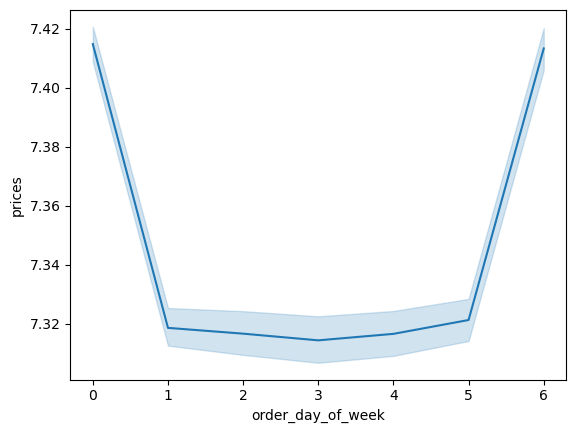

In [27]:
# creating a line chart with the new dataframe
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

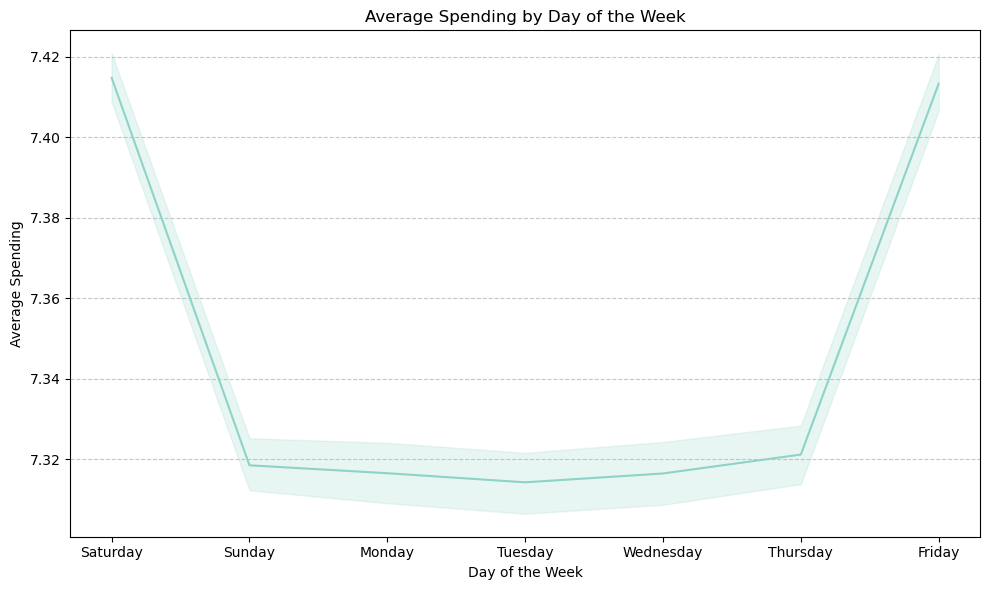

In [28]:


# Define a custom color palette for the days of the week
day_colors = sns.color_palette("Set3", 7)

# Create a line chart using Seaborn
plt.figure(figsize=(10, 6))
line = sns.lineplot(data=df_2, x='order_day_of_week', y='prices', color=day_colors[0])
line.set(xticks=range(7), xticklabels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Average Spending by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Spending')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the line chart as a PNG image
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'line_chart_avg_spending_by_day.png'), dpi=300, bbox_inches='tight')

# Show the line chart
plt.show()


In [18]:
# Export data to pkl

ords_prods_merged.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ords_prods_merged_sep_11.pkl'))

In [19]:
# Saving the histogram as a PNG
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_chart_orders_prices.png'))